<a href="https://colab.research.google.com/github/FengHu101/FengHu101/blob/main/Feng_Hu_Individual_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the MNIST dataset, which is a set of pictures of 70,000 numbers handwritten by U.S. high school students and Census Bureau employees. Each picture is labeled with the number it represents.  I got the MINST data set directly through Scikit-Learn. (My original plan was to use Iris dataset, but in fact the size of this dataset was really small and the operability was very limited. So I looked up this even more interesting data set.)

In [ ]:
from sklearn.datasets import fetch_openml #loading dataset.....
mnist = fetch_openml('mnist_784', version = 1, as_frame = False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

Set up X with data, and y with target, we may get 70000 pictures, and 784 features for each picture.

In [ ]:
X = mnist["data"] #set up x,y value
y = mnist["target"]
print(X.shape, y.shape) #size of the dataset

(70000, 784) (70000,)


I am going to visualize the data first since the data is not character string form, so knowing what contents are inside of the data which is important for analysis the data.

In [ ]:
import matplotlib as mpl
import matplotlib. pyplot as plt
from pathlib import Path

current_path = Path.cwd()

In [ ]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28) #resolution of the picture

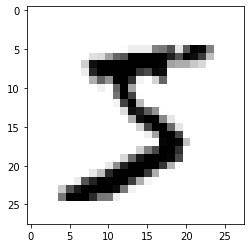

In [ ]:
plt.imshow(some_digit_image, cmap = mpl.cm.binary)

In [ ]:
y[0] #The label number corresponding to the picture

'5'

In [ ]:
import numpy as np 
y = y.astype(np.uint8) #store the pictures

In [ ]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

First try to train a binary classifier that distinguishes between two categories: 5 and non-5. First create the target vector.

In [ ]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(max_iter=1000, tol = 1e-3, random_state=42)
sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

The advantage of stochastic gradient descent (SGD) classifier is that it can effectively process very large data sets, because SGD independently processes training instances, one instance at a time.
https://scikit-learn.org/stable/modules/sgd.html

In [ ]:
sgd.predict([some_digit])

array([ True])

SGDClassifier predicted that the whole image belonged to 5, and the result was correct

A better way to evaluate classifier performance is the confusion matrix.
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv = 3)
print(y_train_pred)
y_train_pred.shape

[ True False False ...  True False False]


(60000,)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

The confusion matrix does provide a lot of information, but the precision and recll rate may be more appropriate for evaluate the classifier.
https://colab.research.google.com/drive/16iSxLAxF-826Jp2lPEZKLrUXQWqu2mR5?usp=sharing

In [ ]:
from sklearn.metrics import precision_score, recall_score

print('precision:', precision_score(y_train_5, y_train_pred))
print('recall rate:', recall_score(y_train_5, y_train_pred))

precision: 0.8370879772350012
recall rate: 0.6511713705958311


According to the results of precision and recall rate, its precision is not very high. When it predicted a picture of 5, it was precised only 83.7 percent of the time, and only 65.1 percent of the 5's in the entire test set were correctly detected.
https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/

I'm also trying to use SVC classifier to train the data, But I don't think we learned that in class. I've seen on the Internet that a lot of people don't think these kinds of algorithms are suitable for large data sets.

In [ ]:
from sklearn.svm import SVC

svm= SVC(gamma="auto", random_state=42)
svm.fit(X_train[:1000], y_train[:1000])

SVC(gamma='auto', random_state=42)

In [ ]:
svm.predict(X_train[:3])

array([5, 0, 4], dtype=uint8)

In [ ]:
svm_scores = svm.decision_function(X_train[:3])
svm_scores

array([[ 2.81585438,  7.09167958,  3.82972099,  0.79365551,  5.8885703 ,
         9.29718395,  1.79862509,  8.10392157, -0.228207  ,  4.83753243],
       [ 9.29838234,  7.09167958,  3.82972099,  1.79572006,  5.8885703 ,
         0.7913911 ,  2.80027801,  8.10392157, -0.22656281,  4.83753243],
       [ 3.82111996,  7.09167958,  4.83444983,  1.79943469,  9.29932174,
         0.79485736,  2.80437474,  8.10392157, -0.22417259,  5.84182891]])

The highest numbers are 9.29718395, 9.29838234, 9.29932174

Previously, each instance would only be classified into one category. In some cases, we want the classifier to output more than one class per instance. For example, in face recognition, when multiple people are identified in an image, there should be a label attached to each identified person. Let's look at a simple example. In it, I'll create an array of y_Multilabels with two target labels for the image of the number: the first to indicate whether the number is greater than or equal to 7, and the second to indicate whether the number is odd.

In [ ]:
y_train_large = (y_train >= 7)
print('y_train_large:\n', y_train_large)

y_train_large:
 [False False False ... False False  True]


In [ ]:
y_train_odd = (y_train % 2 == 1)
print('y_train_odd:\n', y_train_odd)

y_train_odd:
 [ True False False ...  True False False]


In [ ]:
y_multilabel = np.c_[y_train_large, y_train_odd]
print('y_multilabel:\n', y_multilabel)

y_multilabel:
 [[False  True]
 [False False]
 [False False]
 ...
 [False  True]
 [False False]
 [ True False]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, p=1)
knn.fit(X_train, y_multilabel)

KNeighborsClassifier(n_neighbors=6, p=1)

https://colab.research.google.com/drive/16iSxLAxF-826Jp2lPEZKLrUXQWqu2mR5?usp=sharing#scrollTo=or5cauhu7ERw

In [ ]:
print('y_train[:3]: ', y_train[:3])
knn.predict(X_train[:3])

y_train[:3]:  [5 0 4]


array([[False,  True],
       [False, False],
       [False, False]])

As we can see, they all turned out to be correct. All three test instances have values less than 7, and only 5 is odd.